In [1]:
import numpy as np
import pandas as pd

In [2]:
!nvidia-smi

Tue Jan  4 00:03:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


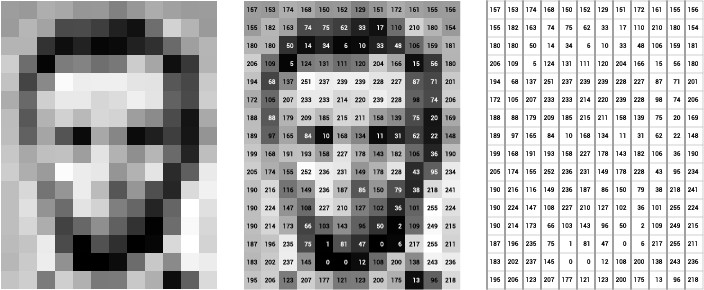

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)#影像正規畫
test_datagen = ImageDataGenerator(rescale=1/255)

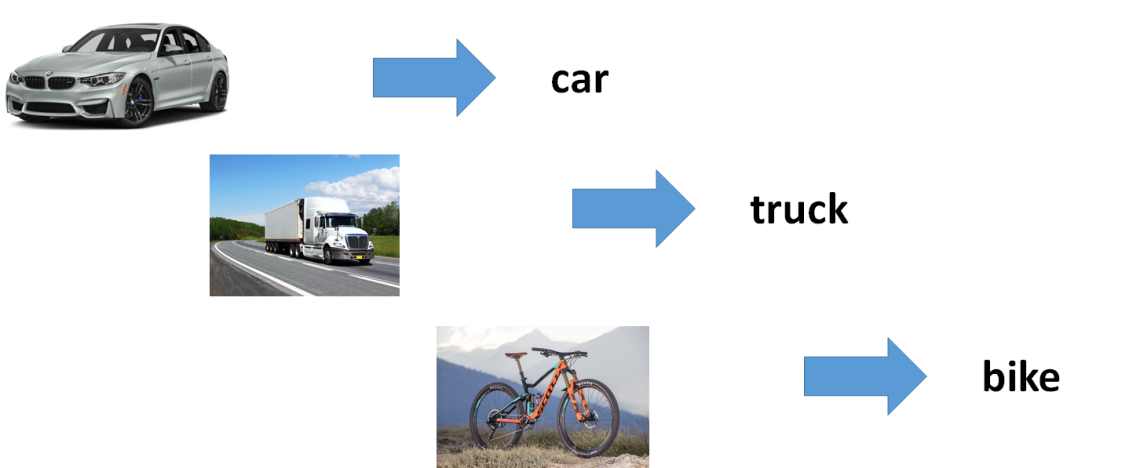

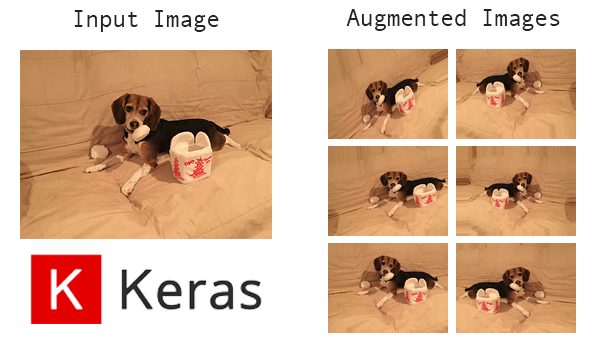

In [5]:
train_data = train_datagen.flow_from_directory(
                "../input/cifar10-pngs-in-folders/cifar10/train", # 目標目錄
                target_size=(32,32), # 所有影象調整為32x32
                batch_size=20,
                seed=10)
validation_data = test_datagen.flow_from_directory(
                "../input/cifar10-pngs-in-folders/cifar10/test", # 目標目錄
                target_size=(32,32), # 所有影象調整為32x32
                batch_size=20,
                seed=10)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [6]:
train_data.class_indices #Label對應表

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [7]:
class_names = list(train_data.class_indices.keys())
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
train_imgs, labels = next(train_data)
print(train_imgs.shape) #顯示資料維度

(20, 32, 32, 3)


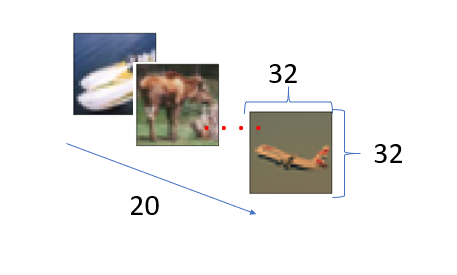

Text(0.5, 0, 'deer')

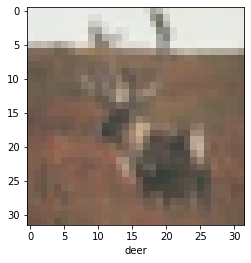

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_imgs[10])
plt.xlabel(class_names[np.argmax(labels[10])])#顯示 Label與影像資料

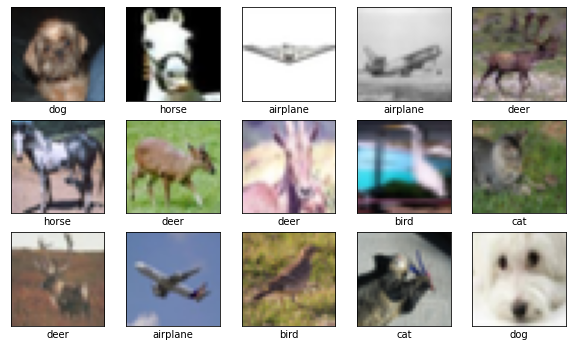

In [10]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(labels[i])])
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dense,MaxPooling2D,Flatten,Dropout,MaxPool2D,GlobalAveragePooling2D,Lambda, LeakyReLU
from keras.layers.normalization import BatchNormalization

In [12]:
def frac_max_pool(x):
    return tf.nn.fractional_max_pool(x, [1.0, 1.41, 1.41, 1.0], pseudo_random=True, overlapping=True)[0]

In [13]:
LeNet = Sequential()

LeNet.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool))
LeNet.add(Dropout(0.3))

LeNet.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool)) 
LeNet.add(Dropout(0.35))

LeNet.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool))
LeNet.add(Dropout(0.35))

LeNet.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool))
LeNet.add(Dropout(0.4))

LeNet.add(Conv2D(filters=160, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=160, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool)) 
LeNet.add(Dropout(0.45))

LeNet.add(Conv2D(filters=192, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Conv2D(filters=192, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(Lambda(frac_max_pool))
LeNet.add(Dropout(0.5))

LeNet.add(Conv2D(filters=192, kernel_size=(1, 1), padding='same', kernel_initializer='he_uniform'))
LeNet.add(LeakyReLU())
LeNet.add(BatchNormalization())
LeNet.add(GlobalAveragePooling2D())
LeNet.add(Dense(units=10, kernel_initializer='he_uniform', activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
lambda (Lambda)              (None, 22, 22, 32)        0

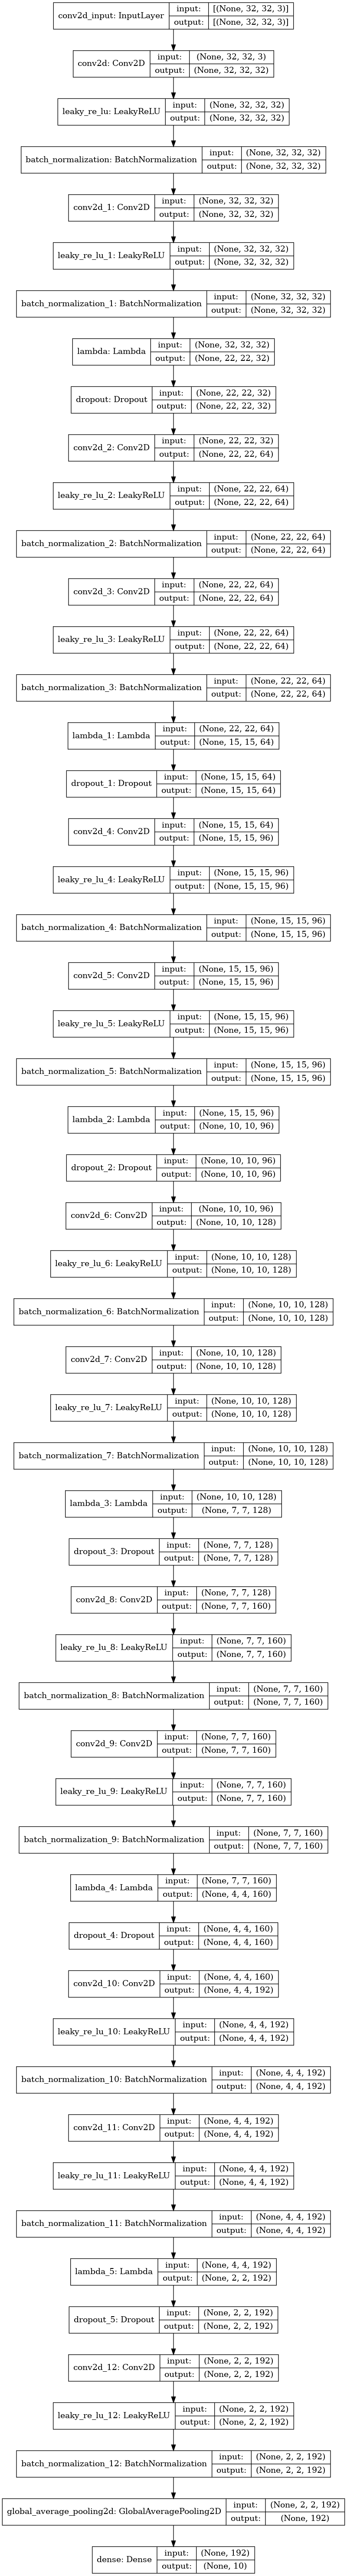

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(LeNet, to_file='LeNet.png', show_shapes=True, show_layer_names=True)

In [15]:
LeNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = LeNet.fit_generator(train_data,steps_per_epoch=50000/20,epochs=150,validation_data=validation_data, validation_steps = 10000//20)#epochs=150

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
2500/2500 [==============================] - 298s 116ms/step - loss: 1.7237 - accuracy: 0.3639 - val_loss: 1.2454 - val_accuracy: 0.5453
Epoch 2/150
2500/2500 [==============================] - 131s 52ms/step - loss: 1.2070 - accuracy: 0.5681 - val_loss: 1.0244 - val_accuracy: 0.6449
Epoch 3/150
2500/2500 [==============================] - 131s 53ms/step - loss: 1.0308 - accuracy: 0.6379 - val_loss: 0.9066 - val_accuracy: 0.6880
Epoch 4/150
2500/2500 [==============================] - 133s 53ms/step - loss: 0.9333 - accuracy: 0.6780 - val_loss: 0.8174 - val_accuracy: 0.7136
Epoch 5/150
2500/2500 [==============================] - 133s 53ms/step - loss: 0.8420 - accuracy: 0.7111 - val_loss: 0.7230 - val_accuracy: 0.7520
Epoch 6/150
2500/2500 [==============================] - 133s 53ms/step - loss: 0.7796 - accuracy: 0.7343 - val_loss: 0.8560 - val_accuracy: 0.7067
Epoch 7/150
2500/2500 [==============================] - 135s 54ms/step - loss: 0.7337 - accuracy: 0.7509 - val

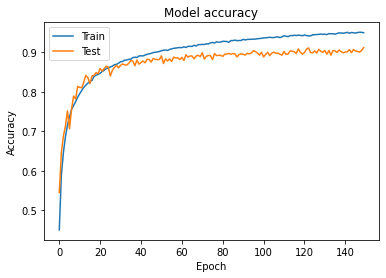

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
test_imgs, test_labels = next(validation_data)
predictions = LeNet.predict(test_imgs)

In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label1 = np.argmax(true_label)
    if predicted_label == true_label1:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label1]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    true_label1 = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label1].set_color('green')

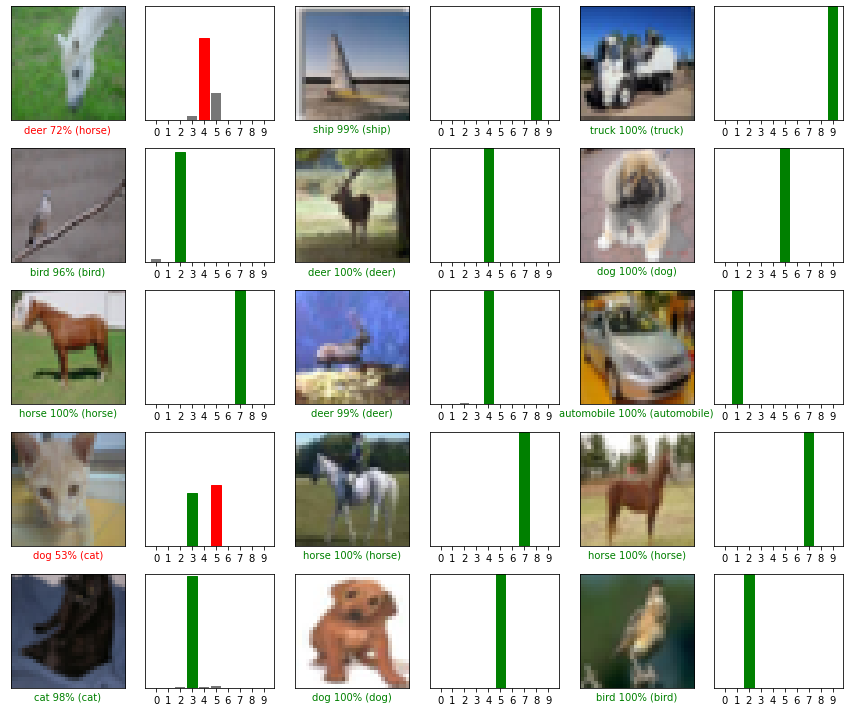

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [21]:
LeNet.save('my_LeNet.h5')